# MPCR OISC

In [ ]:
# Thing <- Name of the thing <- Name of the Name of the thing
# 0 Location of IP
# M[IP] Value of IP
# a  Location of Location of Value to be Copied
# b  Location of Location of Value to be Pasted
# i  Location of Value to be Copied
# j  Location of Value to be Pasted
# x  Value to be Copied
# a,b  = M[IP]-2,M[IP]-1
# i,j  = M[a]   ,M[b]
# i,j  = M[M[IP]-2]   ,M[M[IP]-1]
# x    = M[i]
# y    = M[j]
# y    = x
# M[j] = M[i]
# M[M[M[IP]-1]] = M[M[M[IP]-2]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 2500

In [ ]:
def D(word):  #Dictionary
    if word in words:
        return np.where(word == words)[0][0]
    else:
        return -1

In [ ]:
def recode(codes):
    for i in range(len(codes)):
        if codes[i] != 0 and D(codes[i]) != -1:
            codes[i] = D(codes[i])
    return np.array(codes).astype(int)

In [ ]:
def compile_program(X):
    program = []
    for x in X.split(' '):

        if x.lstrip("-").isdigit():
            program += [int(x), D('L'), D('L'), D('S')]
        elif "," in x:
            a,b = recode(x.split(','))
            program += [int(a),int(b)]
        else:
            program += [D(x), D('W')]

    program += [0, D('L'), D('L'), D('IP')]
    return program

In [ ]:
def setup(program):

    program = compile_program(program)

    M = np.zeros(N, dtype=int)
    M[:len(codes)] = codes
    M[D("PS"):D("PS") + len(program)] = program
    M[D("IP")] = D("PS")
    M[D("SL")] = 0
    M[D("WL")] = 0

    return M

In [ ]:
def run(M):

    IP,A,B,C,Add,Sub,Mult,Div,L,P,S,SL,W,WL,Equal,Greater,Lesser = (D(x) for x in ["IP","A","B","C","Add","Sub","Mult","Div","L","P","S", "SL", "W", "WL","Equal","Greater","Lesser"])

    while M[IP] > 0:

        M[IP] += 2

        a,b = M[IP]-2 , M[IP]-1
        i,j = M[a]    , M[b]     #copy from i paste in j

        if i == S and j == L:
            M[L] = i
        elif i == W and j == L:
            M[L] = i

        elif j == L:
            M[L] = i

        elif i == S:
            M[j] = M[SL + M[SL]]
            M[SL] -= 1
        elif j == S:
            M[SL] += 1
            M[SL + M[SL]] = M[i]

        elif i == W:
            M[j] = M[WL + M[WL]]
            M[WL] -= 1
        elif j == W:
            M[WL] += 1
            M[WL + M[WL]] = M[0]
            M[0] = M[i]

        elif i == P:
            M[j] = M[M[A]]
        elif j == P:
            M[M[A]] = M[i]

        else:
            M[j] = M[i]

        M[Add]  = M[A] + M[B]
        M[Sub]  = M[A] - M[B]
        M[Mult] = M[A] * M[B]
        M[Div]  = 0 if M[B] == 0 else M[A] // M[B]

        M[Equal]   = M[A] == M[B]
        M[Greater] = M[A] > M[B]
        M[Lesser]  = M[A] < M[B]

    return M

In [ ]:
def load_from_string(content):
    lines = content.strip().split("\n")
    words = np.zeros(N, dtype='object')
    codes = np.zeros(N, dtype='object')
    i = 0
    for line in lines:
        line = line.strip().replace(',', ' ').split()
        words[i] = line[0]
        c = line[1:]
        l = len(c)
        if l > 1:
            codes[i] = i+1
            i+=1
        codes[i:i+l] = c
        i += 1
        if l > 1:
            i+= l-1
    return words, codes

In [18]:
code_ai = """
IP
A
B
C
X
Y
Z
I
J
K
Add
Sub
Mult
Div
Equal
Greater
Lesser
L
S
W
P
Halt 0,L L,0
Push A,S W,0
Peek S,A A,S W,0
Pop S,A W,0
Drop S,C W,0
Dup S,A A,S A,S W,0
Swap S,B S,A B,S A,S W,0
Zero 0,L L,S W,0
One 1,L L,S W,0
+ S,B S,A Add,S W,0
- S,B S,A Sub,S W,0
* S,B S,A Mult,S W,0
/ S,B S,A Div,S W,0
Not S,A -1,L L,B Mult,A 1,L L,B Add,S W,0
Negate S,A -1,L L,B Mult,S W,0
Rot S,C S,B S,A C,S A,S B,S W,0
Continue A,A W,0
Branch Dup,W Not,W Rot,W *,W Rot,W *,W +,W S,A A,W W,0
If Continue,S Rot,W Branch,W W,0
Square Dup,W *,W W,0
Cube Dup,W Square,W *,W W,0
Fourth Square,W Square,W A,A W,0
Double Dup,W +,W W,0
-- S,A 1,L L,B Sub,S W,0
++ S,A 1,L L,B Add,S W,0
== S,B S,A Equal,S W,0
> S,B S,A Greater,S W,0
< S,B S,A Lesser,S W,0
Word1 Double,W W,0
Apple W,0
Orange W,0
! S,A S,P W,0
@ S,A P,S W,0
Halve S,A 2,L L,B Div,S W,0
Over S,B S,A A,S B,S A,S W,0
Mod S,Y S,X X,A Y,B Div,A Mult,B X,A Sub,S W,0
I-- I,S --,W S,I W,0
I++ I,S ++,W S,I W,0
I--Y0 I,S --,W S,I Y,0 W,0
Loop S,I I--,W S,X IP,Y X,W Continue,S I--Y0,S I,S One,W >,W Branch,W W,0
SL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
WL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
PS 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
DL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
"""

In [19]:
code_ai += ""

In [22]:
words, codes = load_from_string(code_ai)
codes = recode(codes)

In [ ]:
count = 0
for element in zip(words.tolist(),codes.tolist()):
    if element[0] != 0:
        print(count, element)
    else:
        print(count, element[1])
    count += 1
    if count == 200:
        break

In [25]:
# Test data
number_test_programs = [(f"{i}", [i]) for i in range(100)]

for i, (program, expected_answer) in enumerate(number_test_programs):
    M = setup(program)
    M = run(M)
    answer = M[D('SL')+1:D('SL')+1+M[D('SL')]]
    assert np.array_equal(answer, np.array(expected_answer)), f'Test {program} failed. Expected {expected_answer}, but got {answer.tolist()}.'


test_programs = [
    ("10 11 +", [21]),                                     # Add 10 and 11
    ("10 3 -", [7]),                                       # Subtract 3 from 10
    ("8 9 *", [72]),                                       # Multiply 8 by 9
    ("10 2 /", [5]),                                       # Divide 10 by 2
    ("10 3 >", [1]),                                       # Check if 10 is greater than 3
    ("3 5 >", [0]),                                        # Check if 3 is greater than 5
    ("1 Not", [0]),                                        # Logical NOT of 1
    ("5 Fourth", [625]),                                   # Raise 5 to the power of 4
    ("8 9 * 7 + Fourth", [38950081]),                      # Multiply 8 and 9, add 7, and raise the result to the power of 4
    ("0 Not", [1]),                                        # Logical NOT of 0
    ("-5 Negate", [5]),                                    # Negate -5
    ("6 --", [5]),                                         # Decrement 6 by 1
    ("3 Double", [6]),                                     # Double the value 3
    ("3 5 -", [-2]),                                       # Subtract 5 from 3
    ("3 5 >", [0]),                                        # Check if 3 is greater than 5
    ("0 5 >", [0]),                                        # Check if 0 is greater than 5
    ("6 5 >", [1]),                                        # Check if 6 is greater than 5
    ("5 Double,S Fourth,S One Branch", [625]),             # Double 5, raise it to the power of 4, and branch based on 1 (true)
    ("5 Double,S Fourth,S Zero Branch", [10]),             # Double 5, raise it to the power of 4, and branch based on 0 (false)
    ("5 Continue,S Fourth,S One Branch 22 1 +", [625,23]), # Continue with operations, raise 5 to the power of 4, branch based on 1, add 22 and 1
    ("5 Apple !,W",[]),                                    # Store 5 in the memory location represented by "Apple"
    ("5,L L,S Apple,S !,W Apple,S @,W",[5]),               # Load 5 to stack, store it in "Apple", then retrieve it
    ("4 Halve", [2]),                                      # Divide 4 by 2
    ('2 4 + 3 -', [3]),                                    # Simple arithmetic
    ('2 2 2 2 2 + + + +', [10]),                           # Stacking operations
    ('5 2 * 10 /', [1]),                                   # Multiplication followed by division
    ('5 2 <', [0]),                                        # Lesser than check
    ('2 5 <', [1]),                                        # Lesser than check
    ('5 5 ==', [1]),                                       # Equality check
    ('5 3 ==', [0]),                                       # Non-equality check
    ('5 3 > 4 +', [5]),                                    # Greater than check with subsequent addition
    ('6 3 / 2 *', [4]),                                    # Division followed by multiplication
    ('2 5 > 3 4 + +', [7]),                                # Greater than check with subsequent operations
    ("10 3 Over", [10, 3, 10]),
    ("3 Cube", [27]),
    ("10 3 6 Rot", [6, 10, 3]),
    ("7 4 Mod", [3]),
    ("10 3 Mod", [1]),
    ("5 Continue,S Double,S One Branch", [10]),
    ("5 Double,S One If", [10]),
    ("5 Double,S Zero If", [5]),
    ("2 Word1,S 10 Loop", [1024]),
    ("2 Word1,S 8 Loop", [256])
    ]


In [26]:
for i, (program, expected_answer) in enumerate(test_programs):
    M = setup(program)
    M = run(M)
    answer = M[D('SL')+1:D('SL')+1+M[D('SL')]]
    assert np.array_equal(answer, np.array(expected_answer)), f'Test {program} failed. Expected {expected_answer}, but got {answer.tolist()}.'

print('All tests passed.')

All tests passed.


In [ ]:
def REPL(M):

    while True:

        program = input()

        if program == "Exit": break

        program = compile_program(program)

        M[D("PS"):D("PS") + len(program)] = program
        M[0] = D("PS")

        M = run(M)

        # print(M[D('SL'):D('SL')+8])
        # print(M[D('SL') + M[D('SL')]])
        print(M[D('SL')+1:D('SL')+1+M[D('SL')]])

In [ ]:
# 8 9 * 7 + Fourth

In [ ]:
program = ""
M = setup(program)
REPL(M)

In [ ]:
n = 20

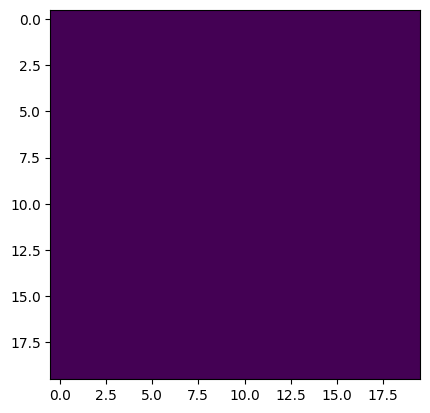

In [ ]:
plt.imshow(M[D('DL')+1:D('DL')+n*n+1].reshape(n,n))

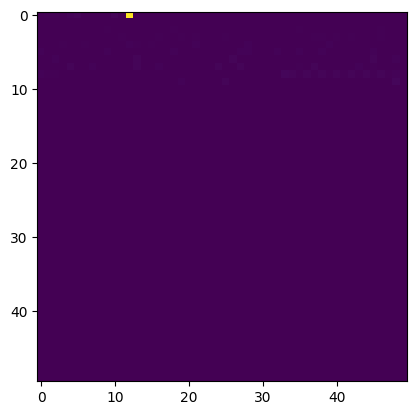

In [ ]:
plt.imshow(M.reshape(50,50))

In [ ]:
new_code = '''TurtleX W,0
TurtleY W,0'''

In [ ]:
code_ai += new_code

words, codes = load_from_string(code_ai)
codes = recode(codes)

In [ ]:
program = ""
M = setup(program)

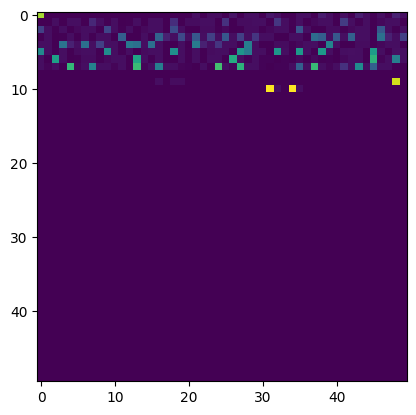

In [ ]:
plt.imshow(M.reshape(50,50))

#Notes

In [ ]:
# Save_Point
# IP,Y

# Jump_to_Save_Point
# Y,IP

In [ ]:
# 1 273 10

# Loop, looks for count on tos and address after

# Save count to I
# S,I

# Save word address on stack to X to run later
# S,X

# Save spot to go back later
# IP,Y

#Run word
#X,W

# Copy I to S and if > 0 then (I--_Y,S) else Continue


I--Y0 I,S --,W S,I Y,0 W,0
Loop S,I I--,W S,X IP,Y X,W Continue,S I--Y0,S I,S One,W >,W Branch,W W,0

In [ ]:
#Add Numbers
M = np.zeros(500, dtype=int)    #Memory

P = [100,1,101,2,4,1,102,2,4,1,103,2,4,1,104,2,4,50]     #add data from mem loc 100 to 104
# P = [100,1,101,2,6,1,102,2,6,1,103,2,6,1,104,2,6,50]   #mult data from mem loc 100 to 104

M[0:len(P)] = P
M[100:105] = [1,2,3,4,5]  #Data

# The Machine #
# while M[M[M[0]]] > -1:
for i in range(len(P)):
    #programLocation = M[0]
    #indexAtProgramLocation = M[M[0]]
    #valueAtIndexAtProgramLocation = M[M[M[0]]]

    M[M[M[0] + 1]] = M[M[M[0]]] #Move A to B

    M[4] = M[1] + M[2]
    M[5] = M[1] - M[2]
    M[6] = M[1] * M[2]
    M[7] = M[1] / M[2] if M[2] != 0 else 0
    M[8] = M[1] == M[2]
    M[9] = M[1] < M[2]
    M[10] = M[1] > M[2]
    M[0] = M[0] + 2 #Move Inst Counter

In [ ]:
while np.prod(M[:,0] >= 0) == 1:

    M[:,0] += 2

    A = M[:,M[:,0]-2]
    B = M[:,M[:,0]-1]

    M[:,B] = M[:,A]

    M[:,4]  = M[:,1] + M[:,2]
    M[:,5]  = M[:,1] - M[:,2]
    M[:,6]  = M[:,1] * M[:,2]
    M[:,7]  = np.where(M[:,2]!=0,M[:,1] // M[:,2],0)                        #M[:,1] // M[:,2] if M[:,2]!=0 else 0
    M[:,8]  = (M[:,1] > M[:,2]).astype(int)
    M[:,9]  = (M[:,1] < M[:,2]).astype(int)
    M[:,10] = (M[:,1] == M[:,2]).astype(int)
    M[:,11] = np.minimum(M[:,1],M[:,2]).astype(int)
    M[:,12] = np.maximum(M[:,1],M[:,2]).astype(int)
    M[:,13] = ~M[:,1]
    M[:,14] = M[:,1]^M[:,2]
    M[:,15] = np.where(M[:,3],M[:,1],M[:,2])                                #M[:,1] if M[:,3] else M[:,2]

In [ ]:
from flask import Flask, request, escape
import numpy as np

app = Flask(__name__)

FIXED_LENGTH = 100
arr = np.full((FIXED_LENGTH,), ord(' '), dtype=int)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Convert input text to numpy array of ASCII values
        text = request.form.get('text_input')
        ascii_vals = [ord(char) for char in text.ljust(FIXED_LENGTH)[:FIXED_LENGTH]]

        global arr
        arr = np.array(ascii_vals)

    # Convert numpy array to ASCII string for display
    content = ''.join(chr(i) for i in arr)

    # HTML form for user input
    form_html = f'''
    <form method="post">
        <textarea name="text_input" rows="4" cols="50"></textarea><br>
        <input type="checkbox" name="debug" value="on"> Debug Mode<br>
        <input type="submit" value="Update"><br><br>
        <br>Rendered Content:<br>
        {content}
    </form>
    '''

    debug_output = ""
    if "debug" in request.form:
        # Display the numpy array, the raw ASCII, and the rendered HTML content
        debug_output = f'''
        <br>Integer Values:<br><br>
        {', '.join(map(str, arr))}<br>
        <br>Raw ASCII:<br>
        <pre><code>{escape(content)}</code></pre>
        '''



    return form_html + debug_output



app.run(host="0.0.0.0", port=8080, debug=True)
